# 2 Statistics and Model

✅ Previus concluded: preprocess of train dataset, used this here on this notebook

🎯 The goal of this Notebook it is to check a Baseline Model, confirm statistics and create a first model

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Checking whether a numerical feature has a normal distribution or not
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import cross_validate, learning_curve, train_test_split, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import randint

In [2]:
#url = '/home/fernando_cir/code/monrosegregory/credit_score/raw_data/df_preprocessed - 20.08.2024-21h48m.csv'
url = '/home/fernando_cir/code/monrosegregory/credit_score/raw_data/df_cirone-preprocessed.csv'

#This is the TRAIN dataset preprocessed.

In [3]:
df = pd.read_csv(url)
df.head(5)

,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196635,-0.333333,-0.258118,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.555556,-0.75,-0.333333,-0.833333,0.25,-1.000000,-0.888889,0.196635,-0.333333,-0.258118,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.091483,-0.333333,-0.258118,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.722222,-1.111111,-0.329127,-0.333333,-0.258118,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.666667,-0.888889,0.196635,-0.333333,-0.258118,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [4]:
data = df.copy()
data.shape

(100000, 47)

In [5]:
data.shape

(100000, 47)

In [6]:
data.columns

Index(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'sin_Month', 'cos_Month',
       'Credit_History_Age_Months', 'Customer_ID_infrequent_sklearn',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Annual_Income_infrequent_sklearn', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_

In [7]:
pd.set_option('display.max_columns', None)
#configurating pandas so can show to me all the columns

In [8]:
data.head(3)

,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months,Customer_ID_infrequent_sklearn,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Annual_Income_infrequent_sklearn,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196635,-0.333333,-0.258118,-0.649349,-0.150282,-0.292425,-0.111821,0.000000,1.378396,0.291755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.555556,-0.75,-0.333333,-0.833333,0.25,-1.000000,-0.888889,0.196635,-0.333333,-0.258118,-0.042731,-0.150282,-0.101779,-0.251368,0.369340,1.009056,0.312896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.555556,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.091483,-0.333333,-0.258118,-0.437753,-0.150282,-0.285959,-0.018093,0.504528,0.504528,0.304440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [9]:
data["Num_Bank_Accounts"].describe()

count    100000.000000
mean          2.772873
std          29.351201
min          -1.500000
25%          -0.750000
50%           0.000000
75%           0.250000
max         448.000000
Name: Num_Bank_Accounts, dtype: float64

In [10]:
data["Credit_Score"].unique()

array([0, 2, 1])

#### Just a quick reminder: 
#### Good = 0
#### Standard = 2
#### Poor = 1

#### 2.1 Defining the X and y in TRAIN Database to start

In [11]:
X = data.drop("Credit_Score", axis=1)
y = data["Credit_Score"]

In [12]:
X.shape

(100000, 46)

#### 2.2 Create the model (Logistic) before feature selection

In [13]:
#Apenas chegando o warning do modelo de regressão logistica sem max iter
model_log_v0 = LogisticRegression()
model_log_v0.fit(X, y)

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#model_log = LogisticRegression(max_iter=10000)
model_log = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42, max_iter=10000)

model_log.fit(X, y)

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='ovr', random_state=42,
                   solver='liblinear')

#### 2.3 Cross Validation (Logistic) before feature selection

In [31]:
cv_results = cross_validate(model_log, X, y, cv=5)

acc_baseline = float(cv_results["test_score"].mean())

print(acc_baseline)

/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/fernando_cir/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid th

0.6269899999999999


#### 2.4 Learning Curve

In [16]:
train_sizes = np.linspace(1000, 80000, 6, dtype=int)
train_sizes, train_scores, test_scores = learning_curve(model_log, X, y, train_sizes=train_sizes, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
tests_scores_mean = np.mean(test_scores, axis=1)

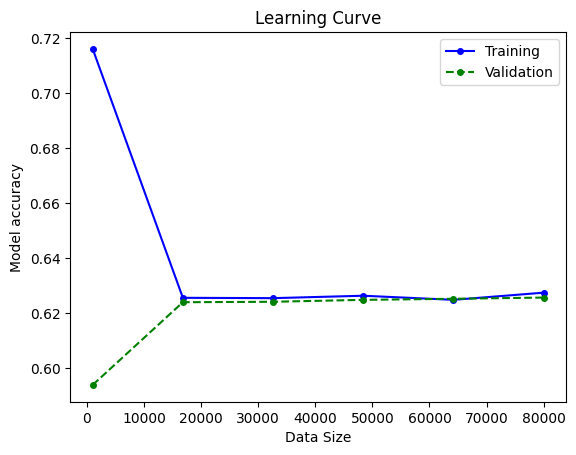

In [17]:
plt.plot(train_sizes, train_scores_mean, color='blue', marker='o', markersize=4, label='Training')

plt.plot(train_sizes, tests_scores_mean, color='green', marker='o', markersize=4, linestyle='--', label='Validation')

plt.title('Learning Curve')
plt.xlabel('Data Size')
plt.ylabel('Model accuracy')
plt.legend()
plt.show()

#### Despite of Accurancy not that good (0.62) the model it is not overfitting, and even not underfitting.
#### Enhance preprocess?
https://codingnomads.com/validation-learning-curve-overfitting-and-underfitting


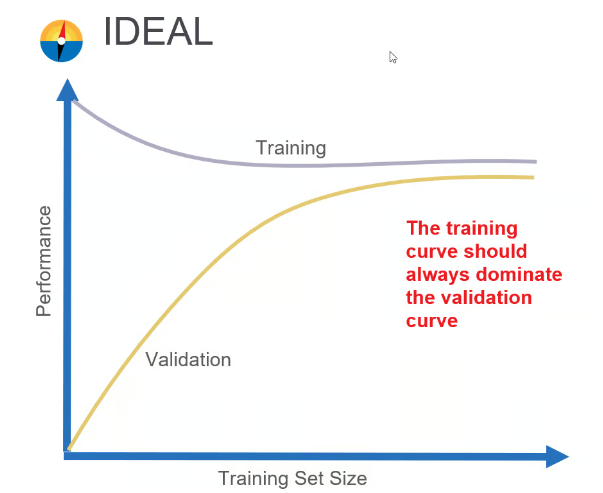

#### 2.5 Correlation (Numerical Features)

<Axes: >

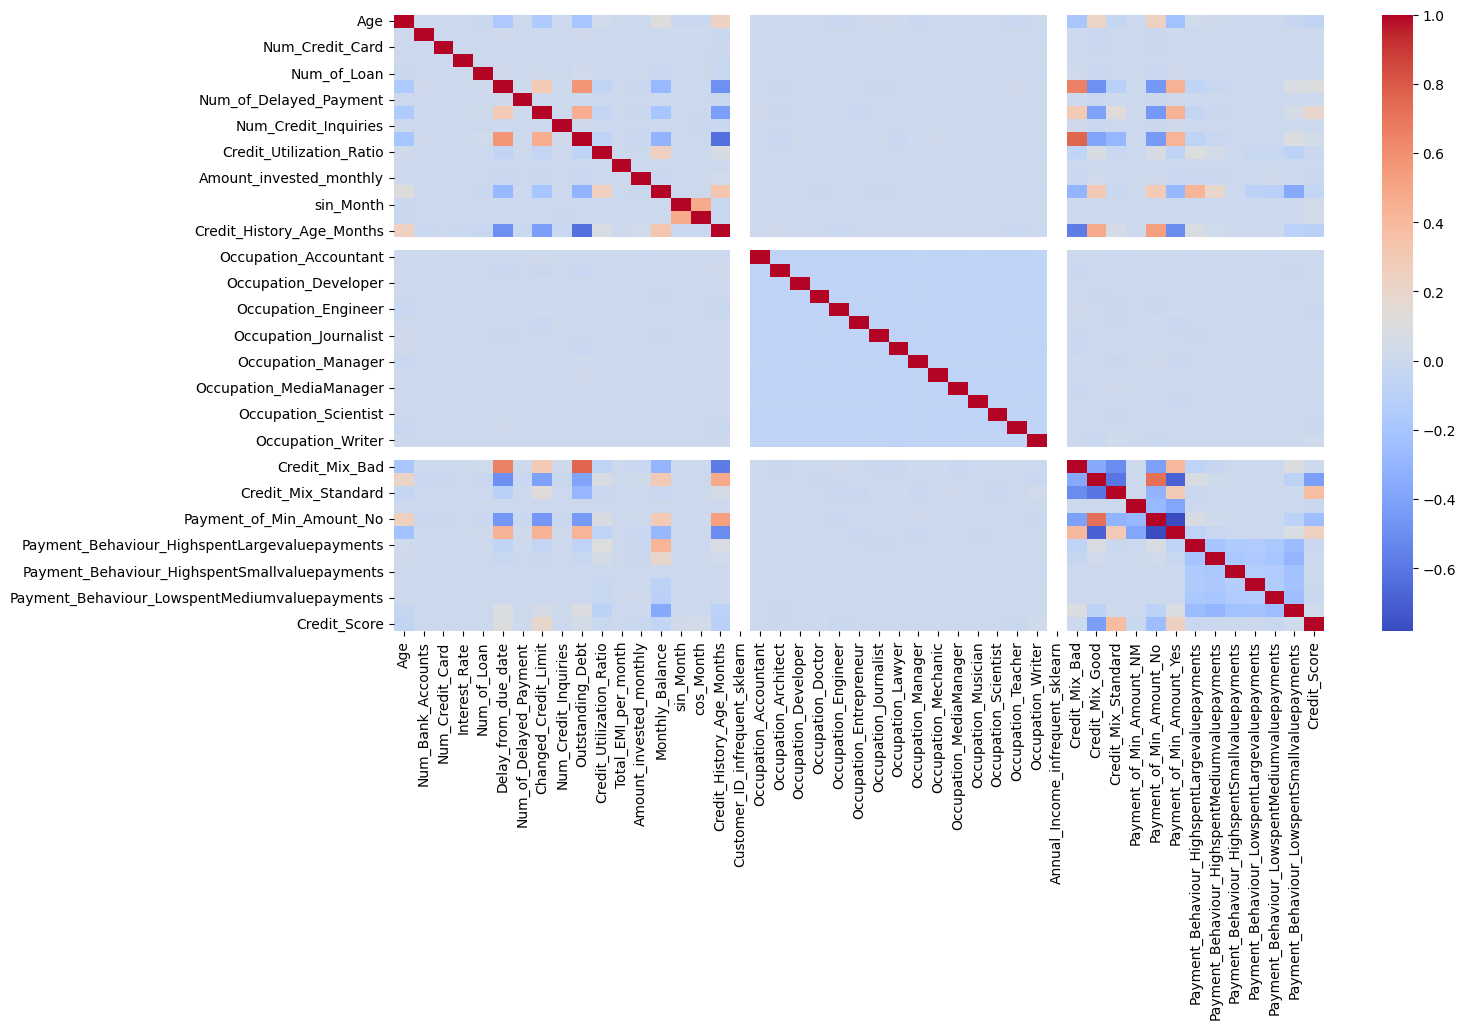

In [28]:
corr_matrix = data.corr()
column_names = corr_matrix.columns

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot = False, annot_kws={"size": 12}, fmt=".2f")
#sns.heatmap(corr_matrix, cmap='coolwarm', annot = True, annot_kws={"size": 12}, fmt=".2f")

#### There are only a few features highly correlated

#### 👇Deeping into the correlation

In [19]:
# Convert the correlation matrix into a DataFrame
corr_df = corr_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]


In [20]:
# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Show the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(20)
#corr_df.sort_values(by="absolute_correlation", ascending=False)

,feature_1,feature_2,correlation,absolute_correlation
1701,Payment_of_Min_Amount_Yes,Payment_of_Min_Amount_No,-0.780071,0.780071
1657,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,-0.780071,0.780071
1449,Credit_Mix_Bad,Outstanding_Debt,0.760932,0.760932
437,Outstanding_Debt,Credit_Mix_Bad,0.760932,0.760932
1653,Payment_of_Min_Amount_No,Credit_Mix_Good,0.720993,0.720993
1521,Credit_Mix_Good,Payment_of_Min_Amount_No,0.720993,0.720993
1522,Credit_Mix_Good,Payment_of_Min_Amount_Yes,-0.692127,0.692127
1698,Payment_of_Min_Amount_Yes,Credit_Mix_Good,-0.692127,0.692127
257,Delay_from_due_date,Credit_Mix_Bad,0.656196,0.656196
1445,Credit_Mix_Bad,Delay_from_due_date,0.656196,0.656196


#### Feature Permutation

In [29]:
# Perform the permutation
permutation_score = permutation_importance(model_log, X, y, n_repeats=10)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)

importance_df.columns=['feature','score importance']


# Show the important features
importance_df.sort_values(by="score importance", ascending = False)

,feature,score importance
5,Delay_from_due_date,0.041181
35,Credit_Mix_Good,0.028405
36,Credit_Mix_Standard,0.022196
9,Outstanding_Debt,0.015929
7,Changed_Credit_Limit,0.013146
39,Payment_of_Min_Amount_Yes,0.009659
16,Credit_History_Age_Months,0.009311
38,Payment_of_Min_Amount_No,0.007322
34,Credit_Mix_Bad,0.00694
45,Payment_Behaviour_LowspentSmallvaluepayments,0.00279


#### Modeling after Score Permutation

In [22]:
X.shape

(100000, 46)

In [24]:
# Drops weak features

#columns_to_drop = ["Delay_from_due_date", "Credit_Mix_Good", "Credit_Mix_Standard", "Outstanding_Debt", "Changed_Credit_Limit", "Payment_of_Min_Amount_Yes", "Credit_History_Age_Months", "Credit_Mix_Bad", "Payment_of_Min_Amount_No", "Payment_Behaviour_LowspentSmallvaluepayments"]

#columns_to_drop = ["Delay_from_due_date", "Credit_Mix_Good", "Credit_Mix_Standard", "Outstanding_Debt"]

#columns_to_drop = ["Delay_from_due_date"]

#columns_to_drop = ["Month"]

#columns_to_drop = ["Month", "Occupation_Manager"]

columns_to_drop = ["Occupation_Manager", "Occupation_Developer", "Occupation_Scientist"]

X_less_features = X.drop(columns=columns_to_drop)

In [25]:
model_log_2 = LogisticRegression(max_iter=10000)
model_log_2.fit(X_less_features, y)

LogisticRegression(max_iter=10000)

In [26]:
cv_results_2 = cross_validate(model_log_2, X_less_features, y, cv=5)

acc = float(cv_results_2["test_score"].mean())

print(acc)

0.6258600000000001


In [ ]:
X_less_features.shape

(100000, 44)